In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from scipy import stats

In [3]:
df=pd.read_csv("../data/laliga_2016_2017.csv")
df["winner"]=df.apply(lambda row: row["HomeTeam"] if row["FTR"]=="H" else row["AwayTeam"],axis=1)

In [4]:
# Number of teams
len(df["winner"].unique())

20

In [5]:
# Number of games per team
2 * len(df)/20

38.0

In [6]:
# Number of wins per team
wins=df.groupby("winner").count()["Div"].values
wins

array([19, 21, 30, 31, 12, 17, 21, 21,  8, 15, 13, 13, 20,  7, 31, 26, 21,
       13, 16, 25])

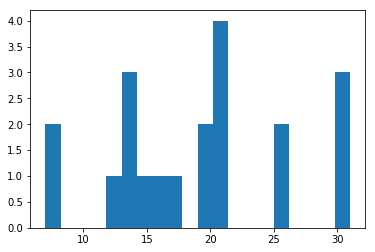

In [7]:
plt.hist(wins,bins=20)
plt.show()

In [8]:
# Page 80 of The success equation

In [9]:
# If the game was pure luck, this would be a binomial with
# n=19 and p=0.5

In [10]:
mi_binom = stats.binom(38,0.5)

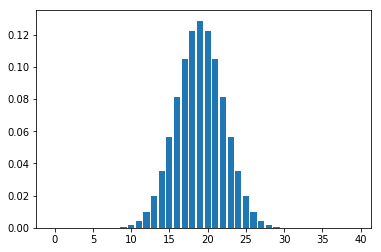

In [11]:
x = np.arange(0,40)
p = list(map(mi_binom.pmf,x))
plt.bar(x,p);

In [12]:
# If the game was pure skill, the same teams would always win
# So the first team wins 19, the second 18, the third 17 ...

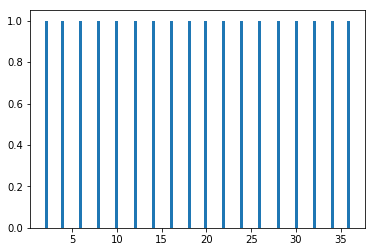

In [13]:
plt.hist(2*np.arange(1,19),bins=100);

In [15]:
# So we calculate the variance of skill as
# Var(Skill) = Var(observed)-Var(luck)
wins.var()-mi_binom.var()

38.6

In [17]:
# We check now the ration skill to observed
(mi_binom.var())/wins.var()

0.1975051975051975

In [ ]:
# The bigger the ration for luck, the better the quality of the league